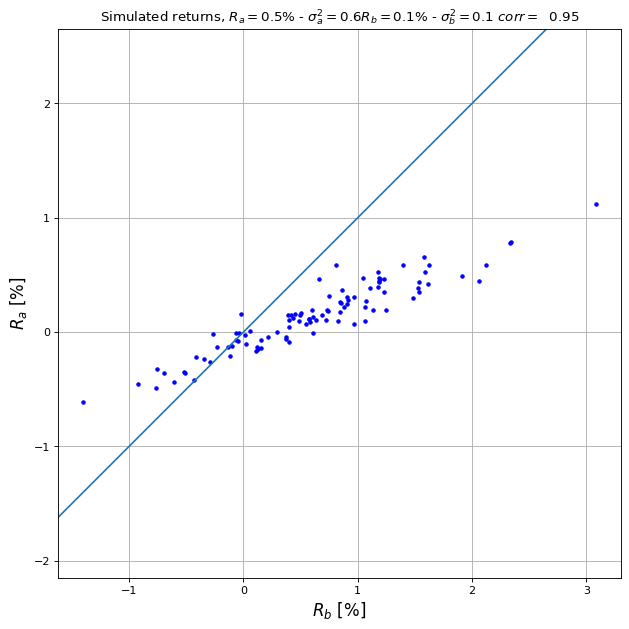

In [41]:
"""Example of generating correlated normally distributed random samples."""

import numpy as np
from scipy.linalg import eigh, cholesky
from scipy.stats import norm
import pandas as pd

from pylab import plot, show, axis, subplot, xlabel, ylabel, grid, figure, title


# Choice of cholesky or eigenvector method.
method = 'cholesky'
#method = 'eigenvectors'

num_samples = 100

var1 = 0.6
var2 = 0.1
corr = 0.95
meanReturn1 = 0.5
meanReturn2 = 0.1

# The desired covariance matrix.
r = np.array([
        [var1, (corr * np.sqrt(var1 * var2))],
        [(corr * np.sqrt(var1 * var2)), var2],
    ])

# Generate samples from three independent normally distributed random
# variables (with mean 0 and std. dev. 1).
x = norm.rvs(size=(2, num_samples))
x

# We need a matrix `c` for which `c*c^T = r`.  We can use, for example,
# the Cholesky decomposition, or the we can construct `c` from the
# eigenvectors and eigenvalues.

if method == 'cholesky':
    # Compute the Cholesky decomposition.
    c = cholesky(r, lower=True)
else:
    # Compute the eigenvalues and eigenvectors.
    evals, evecs = eigh(r)
    # Construct c, so c*c^T = r.
    c = np.dot(evecs, np.diag(np.sqrt(evals)))

# Convert the data to correlated random variables. 
y = np.dot(c, x)

y[0] = y[0] + meanReturn1
y[1] = y[1] + meanReturn2

#
# Plot various projections of the samples.
#
figure(figsize=(20, 20), dpi=80)
ax = subplot(2,2,1)
plot(y[0], y[1], 'b.')
ylabel('$R_{a}$ [%]', size = 15)
xlabel('$R_{b}$ [%]', size = 15)
axis('equal')
title("Simulated returns, $R_{a}=$" + str(meanReturn1) + "% - $\sigma_{a}^{2}=$" + str(var1) + "$R_{b}=$" + str(meanReturn2) + "% - $\sigma_{b}^{2}=$" + str(var2) + " $corr=$  " + str(corr))
grid(True)

ax.axline([0, 0], [1, 1])

show()

<AxesSubplot:xlabel='Time', ylabel='Daily return [%]'>

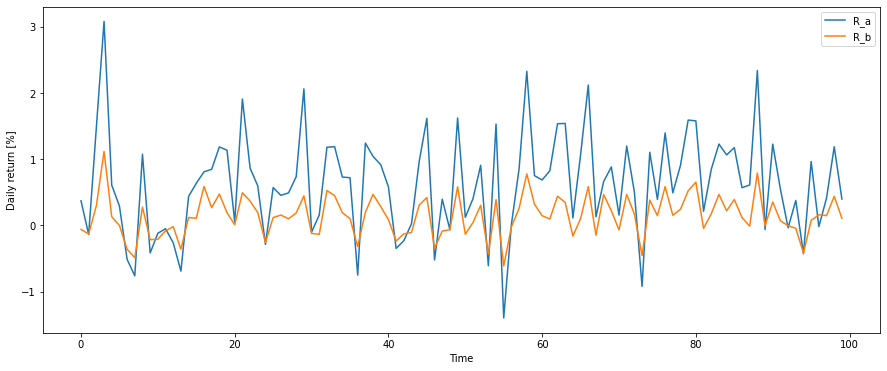

In [47]:
retDF = pd.DataFrame(data = y.T, columns = ["R_a", "R_b"])
retDF.plot(figsize = (15, 6), xlabel = "Time", ylabel = "Daily return [%]", fontsize = 10)

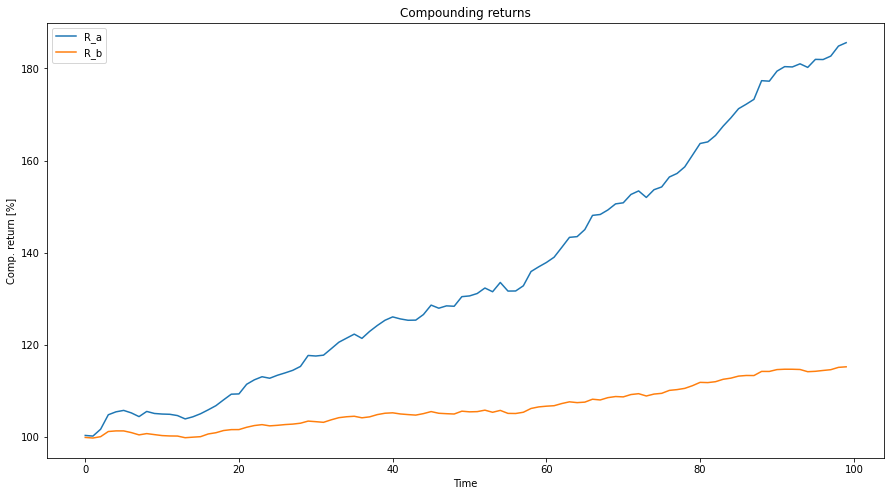

In [54]:
x0 = 100
y0 = 100

ax = (x0 * (1 + retDF["R_a"]/100).cumprod()).plot(xlabel = "Time", ylabel = "Comp. return [%]", title = "Compounding returns", figsize = (15,8))
ax2 = (y0 * (1 + retDF["R_b"]/100).cumprod()).plot()
ax.legend()
ax2.legend()